# Change the sigma parameters of a DFT permittivity
Start by importing some useful routines

In [1]:
import numpy                      as np
import sys
sys.path.insert(0, "../../..")     # This should allow the PDielec modules to be found
from PDielec.HelperRoutines   import getMaterial
from PDielec.HelperRoutines   import calculatePowderSpectrum
from PDielec.HelperRoutines   import calculateSingleCrystalSpectrum


## Define the materials to be used.
In this example we read the VASP file in the current directory
The OUTCAR in this directory is for a VASP calculation on ZnO
The support material will be PTFE

In [2]:
ZnO = getMaterial('ZnO/OUTCAR')
matrix = getMaterial('ptfe')

## Calculate the absorption using MG effective medium theory


In [3]:
frequencies = np.arange(200,500,0.2)
absorption1 = calculatePowderSpectrum(frequencies,ZnO,matrix,0.1)

## Get a copy of the sigma parameters for ZnO (this only works for Drude-Lorentz materials)
At the same time we get the oscillator strengths a

In [4]:
sigmas = ZnO.getSigmas()
strengths = ZnO.getOscillatorStrengths()
vs = ZnO.getFrequencies()
print(sigmas)
print(vs)

[5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
[ 5.08211241e+02  4.02053725e+02  4.02053725e+02  3.72078531e+02
  3.72078531e+02  3.49981672e+02  2.46085122e+02  9.12408480e+01
  9.12408480e+01 -2.54761000e-01 -2.54761000e-01 -9.18595000e-01]


## Compare the absorption coefficients for two different sets of sigma

Just because we can change the frequencies in the second absorption curve the frequencies will be scaled by a factor of 1.2

In [5]:
frequencies = np.arange(200,500,0.2)
absorption1 = calculatePowderSpectrum(frequencies,ZnO,matrix,0.1)
sigmas = [ 10.0 for i in sigmas ]
vs = [ 1.2*v for v in vs ]
ZnO.setSigmas(sigmas)
ZnO.setFrequencies(vs)
# ZnO.setFrequencies(vs)
absorption2 = calculatePowderSpectrum(frequencies,ZnO,matrix,0.1)

## Plot the results to compare the two calculations

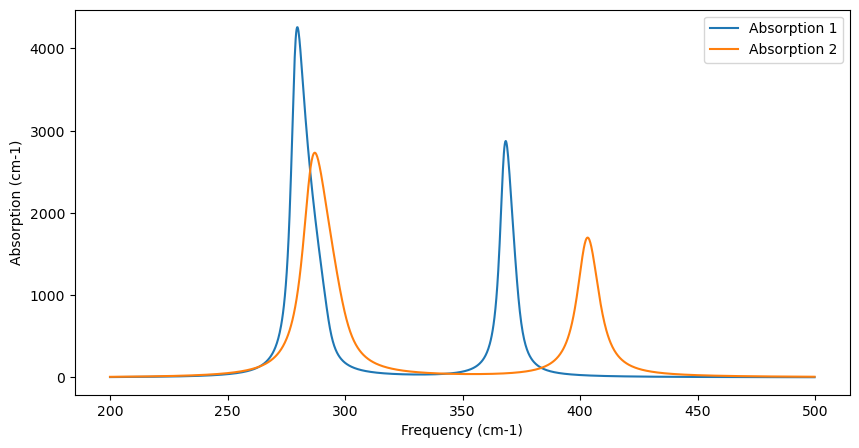

(<matplotlib.legend.Legend at 0x70c6b04af7d0>, None)

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5)) # set the size of the figure
plt.plot(frequencies, absorption1,label='Absorption 1') 
plt.plot(frequencies, absorption2,label='Absorption 2')
plt.xlabel('Frequency (cm-1)')
plt.ylabel('Absorption (cm-1)')
plt.legend(), plt.show()